# Details About Dataset

## Interesting Task Ideas
### Understanding what content is available in different countries
### Identifying similar content by matching text-based features
### Network analysis of Actors / Directors and find interesting insights
### Does Netflix has more focus on TV Shows than movies in recent years.

In [1]:
### Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
### Calling of data set
def read_data():
    data = pd.read_csv("C:/Kaggle_dataset/Netflix/netflix_titles.csv")
    return data

In [3]:
### Reading of dataset
df = read_data()
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [4]:
#### Preprocessing and Feature engineering
df1 = df.copy()
print(df1.head())
print(df1.info())
print(df1.shape)

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

## 3. Data checks to perform

### 3.i) check missing values

In [5]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
per = round(df.isna().sum()*100/df1.shape[0],2)
per

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

In [7]:
df1['director'] = df1['director'].fillna("Unknown")
df1['cast'] = df1['cast'].fillna("Unknown")
df1['country'] = df1['country'].fillna("Unknown")

### 3.ii) check Duplicates

In [8]:
df1.duplicated().sum()

0

### 3.iii) check datatypes

In [9]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


### 3.iv) Checking the number of unique values of each column

In [10]:
df1.nunique()

show_id         8807
type               2
title           8807
director        4529
cast            7693
country          749
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

### 3.v) Check statistics of data set

In [11]:
df1.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
df1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
col = ['type', 'country',
       'release_year', 'rating', 'duration']
for i in col:
    print(df1[i].value_counts())
    print("***********************************")

Movie      6131
TV Show    2676
Name: type, dtype: int64
***********************************
United States                             2818
India                                      972
Unknown                                    831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64
***********************************
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64
***********************************
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y

In [14]:
plt.figure(figsize=(10,4))
df1['country'].value_counts()

United States                             2818
India                                      972
Unknown                                    831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

<Figure size 1000x400 with 0 Axes>

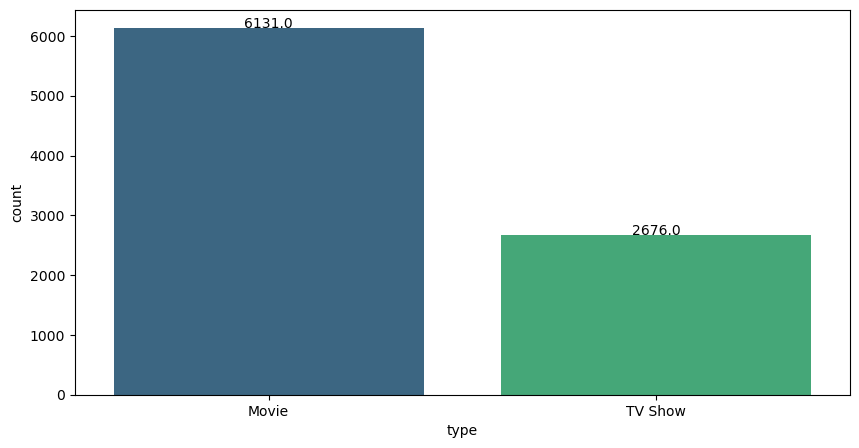

In [15]:
plt.figure(figsize=(10,5))
graph = sns.countplot(data=df1,x='type',palette='viridis')
for p in graph.patches:
    graph.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center' , va = 'baseline')
plt.show()

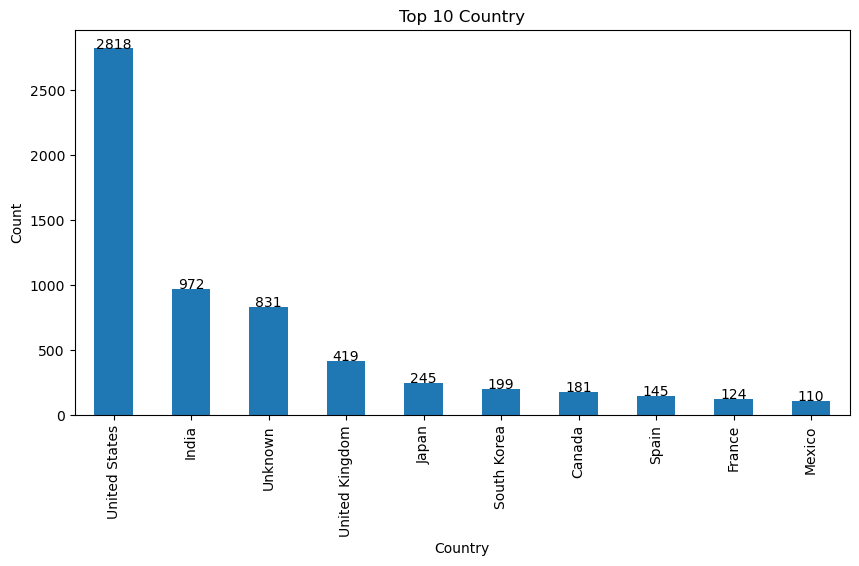

In [16]:
plt.figure(figsize=(10,5))
graph = df1['country'].value_counts().head(10).plot(kind='bar')
for p in graph.patches:
    graph.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center',va = 'baseline')
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Top 10 Country")
plt.show()
    

In [17]:
col = ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in']
for i in col:
    print(df1[i].unique())
    print("***********************************")

['s1' 's2' 's3' ... 's8805' 's8806' 's8807']
***********************************
['Movie' 'TV Show']
***********************************
['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']
***********************************
['Kirsten Johnson' 'Unknown' 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']
***********************************
['Unknown'
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox,

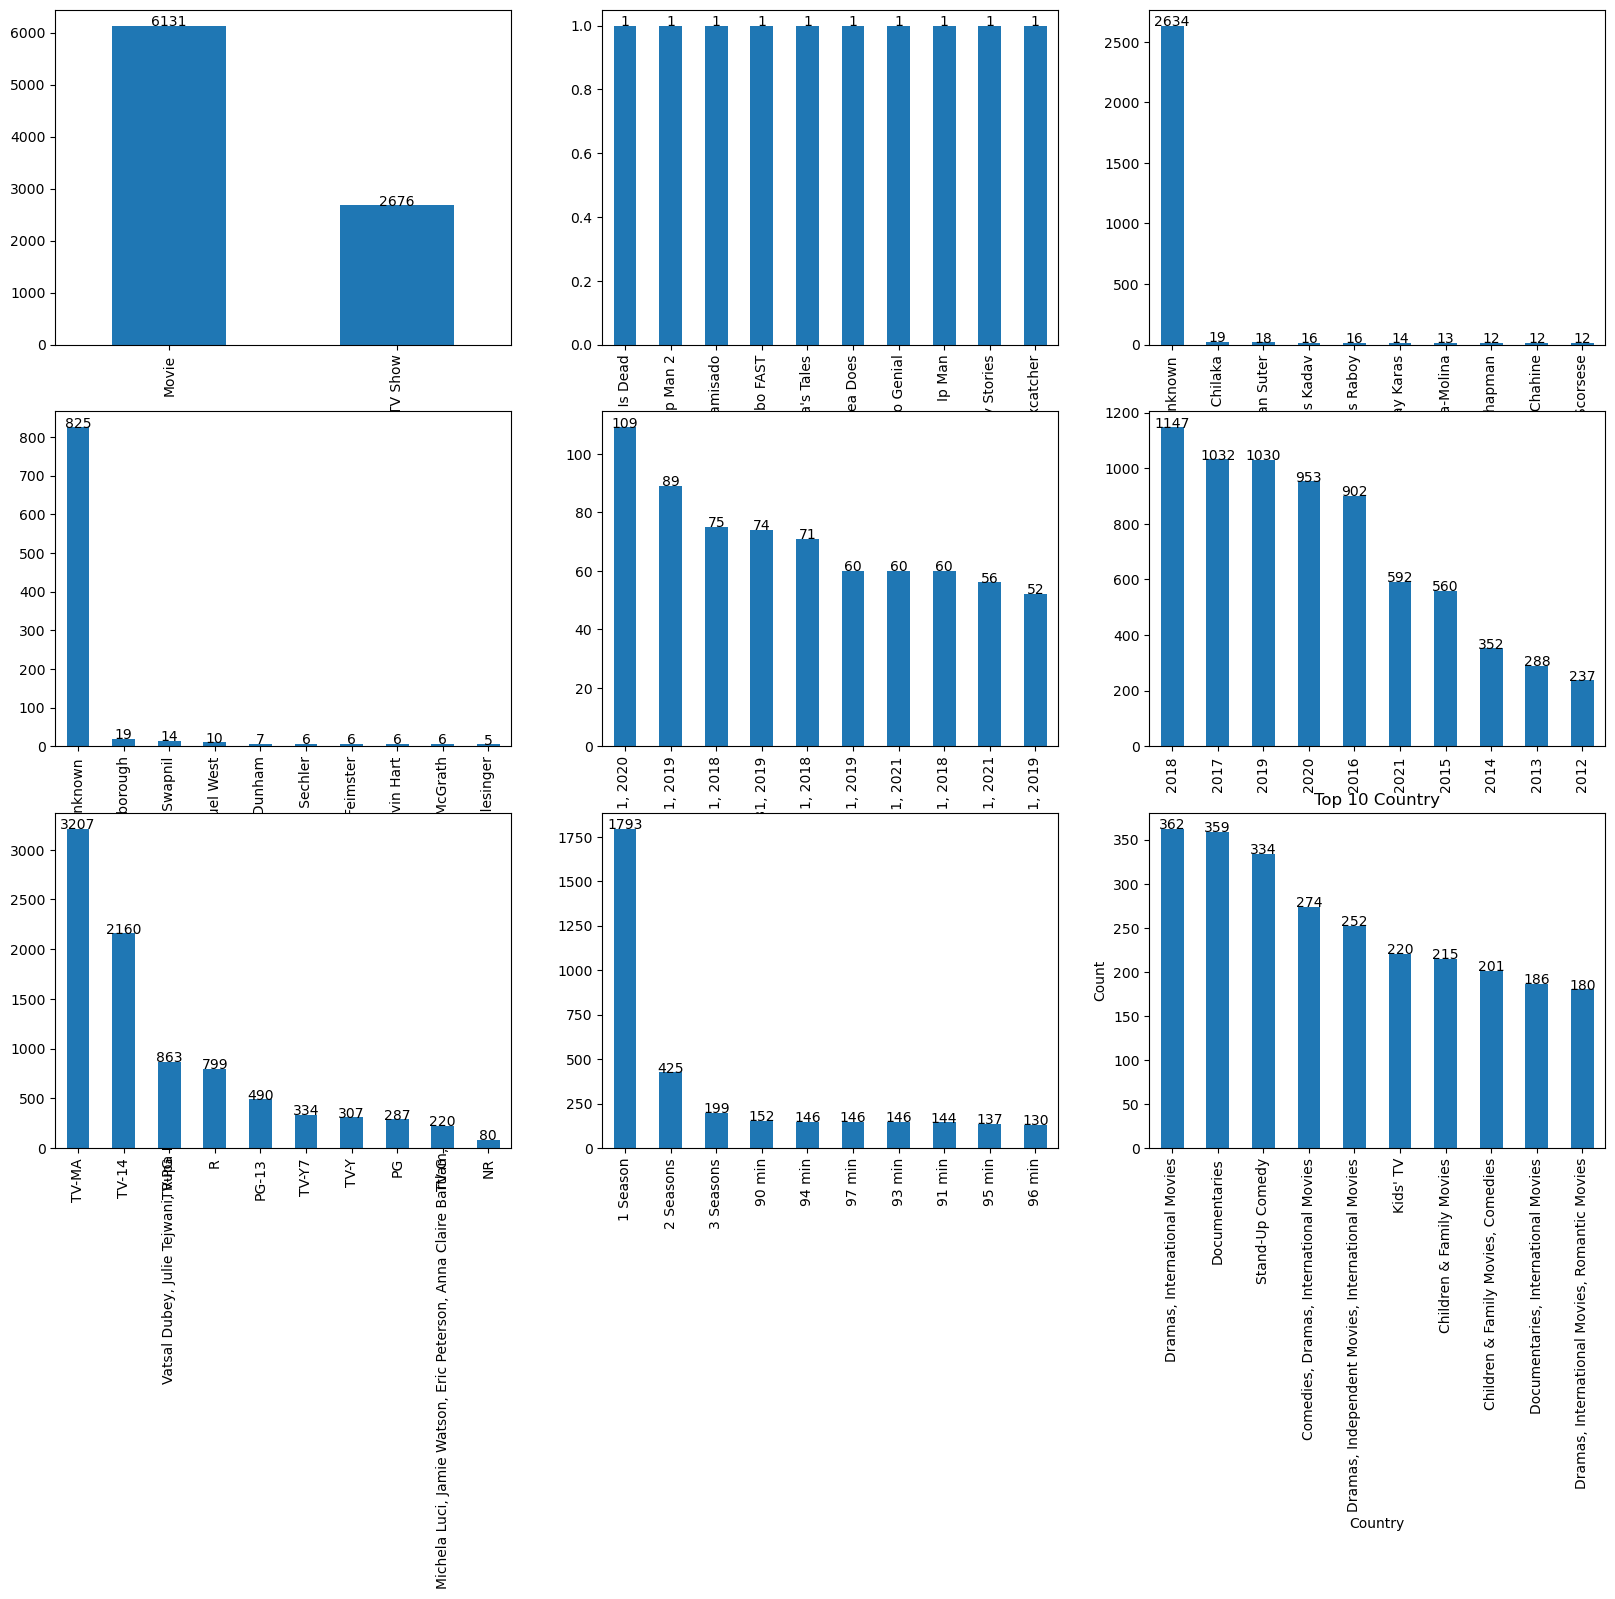

In [18]:
col = [ 'type', 'title', 'director', 'cast',  'date_added',
       'release_year', 'rating', 'duration', 'listed_in']
plt.figure(figsize=(20,20))
for i,cols in enumerate(col,1):
    plt.subplot(4,3,i)
    graph = df1[cols].value_counts().head(10).plot(kind='bar')
    for p in graph.patches:
        graph.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',va = 'baseline')
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Top 10 Country")
plt.show()
    

### Identifying similar content by matching text-based features

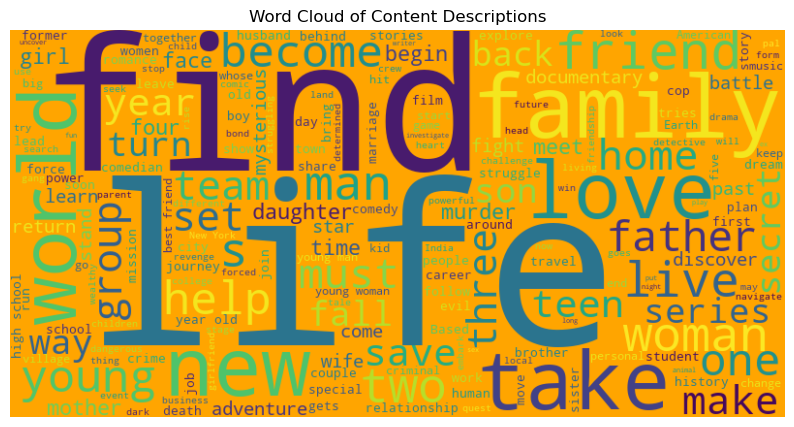

In [19]:
from wordcloud import WordCloud

text = ' '.join(df1['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='orange').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Content Descriptions')
plt.show() 

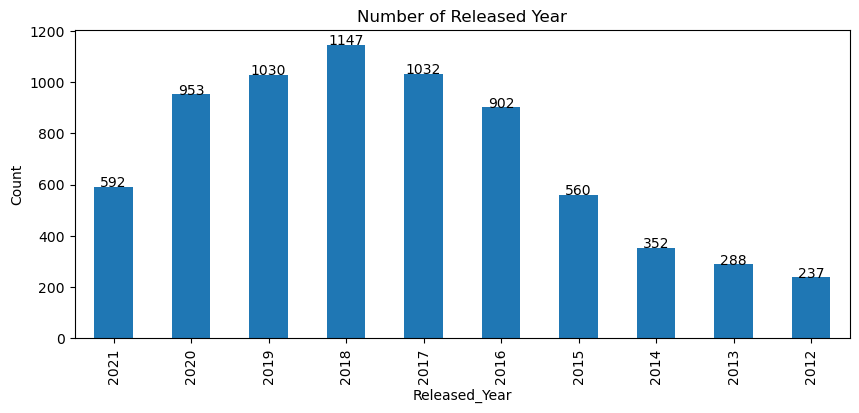

In [20]:
plt.figure(figsize=(10,4))
graph = df1['release_year'].value_counts().sort_index(ascending=False).head(10).plot(kind='bar')
for p in graph.patches:
    graph.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2. ,p.get_height()),ha='center',va='baseline')
plt.xlabel('Released_Year')
plt.ylabel('Count')
plt.title('Number of Released Year')
plt.show()

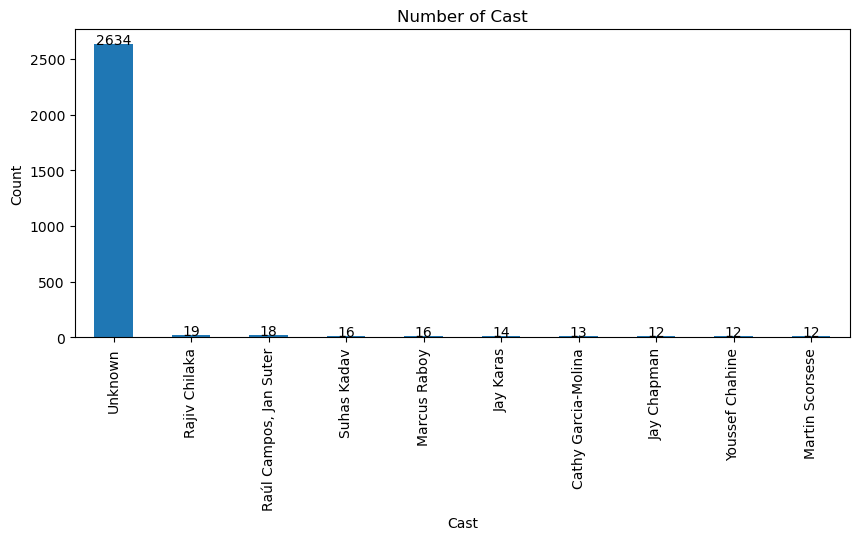

In [21]:
plt.figure(figsize=(10,4))
graph = df1['director'].value_counts().head(10).plot(kind='bar')
for p in graph.patches:
    graph.annotate(f'{p.get_height()}' , ( p.get_x() + p.get_width() / 2., p.get_height()) ,ha='center',va='baseline')
plt.xlabel('Cast')
plt.ylabel('Count')
plt.title('Number of Cast')
plt.show()

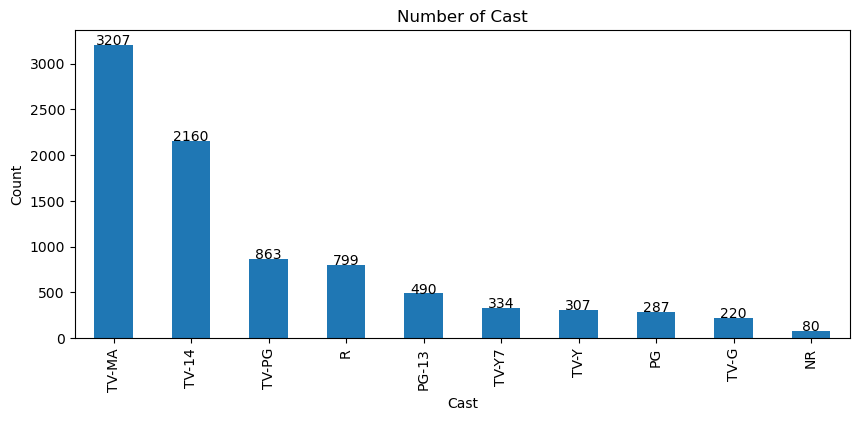

In [22]:
plt.figure(figsize=(10,4))
graph = df1['rating'].value_counts().head(10).plot(kind='bar')
for p in graph.patches:
    graph.annotate(f'{p.get_height()}' , ( p.get_x() + p.get_width() / 2., p.get_height()) ,ha='center',va='baseline')
plt.xlabel('Cast')
plt.ylabel('Count')
plt.title('Number of Cast')
plt.show()

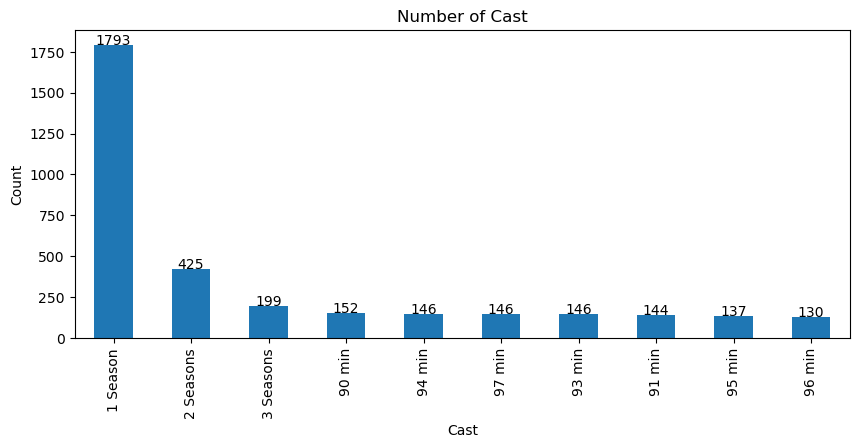

In [23]:
plt.figure(figsize=(10,4))
graph = df1['duration'].value_counts().head(10).plot(kind='bar')
for p in graph.patches:
    graph.annotate(f'{p.get_height()}' , ( p.get_x() + p.get_width() / 2., p.get_height()) ,ha='center',va='baseline')
plt.xlabel('Cast')
plt.ylabel('Count')
plt.title('Number of Cast')
plt.show()

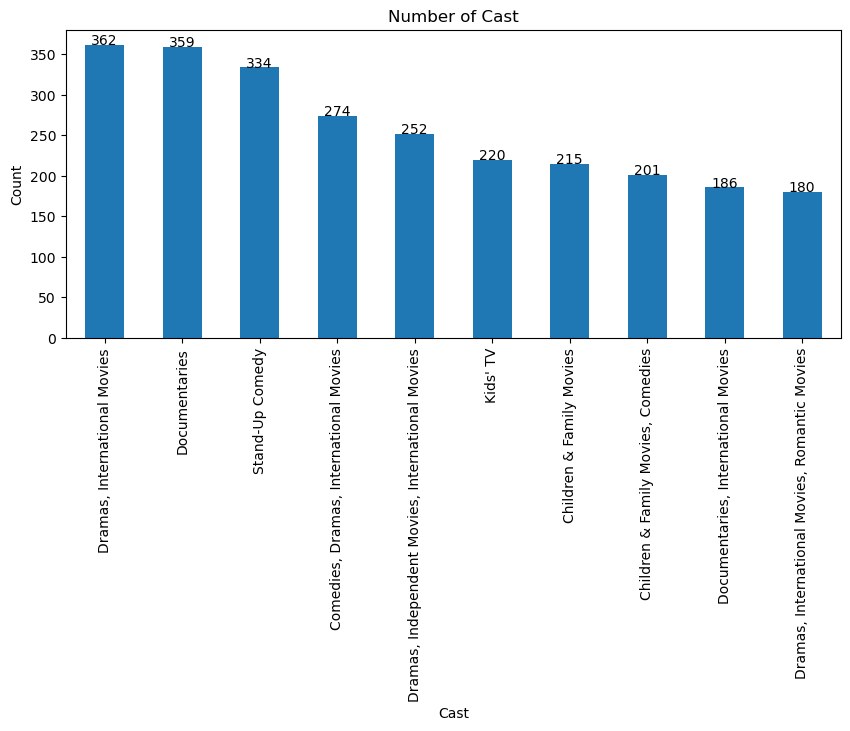

In [24]:
plt.figure(figsize=(10,4))
graph = df1['listed_in'].value_counts().head(10).plot(kind='bar')
for p in graph.patches:
    graph.annotate(f'{p.get_height()}' , ( p.get_x() + p.get_width() / 2., p.get_height()) ,ha='center',va='baseline')
plt.xlabel('Cast')
plt.ylabel('Count')
plt.title('Number of Cast')
plt.show()

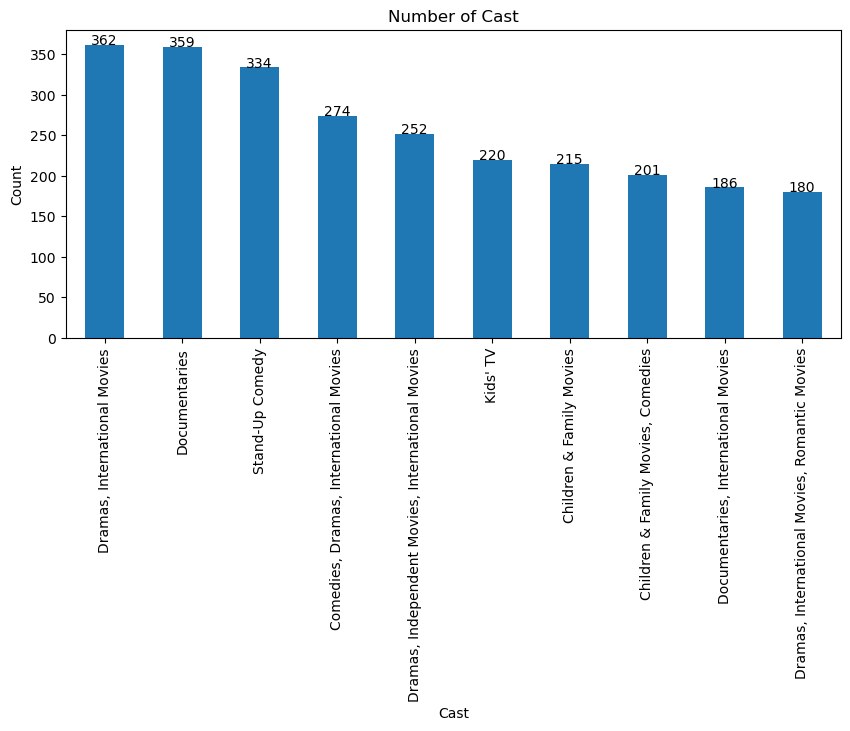

In [25]:
plt.figure(figsize=(10,4))
graph = df1['listed_in'].value_counts().head(10).plot(kind='bar')
for p in graph.patches:
    graph.annotate(f'{p.get_height()}' , ( p.get_x() + p.get_width() / 2., p.get_height()) ,ha='center',va='baseline')
plt.xlabel('Cast')
plt.ylabel('Count')
plt.title('Number of Cast')
plt.show()

<Figure size 1000x400 with 0 Axes>

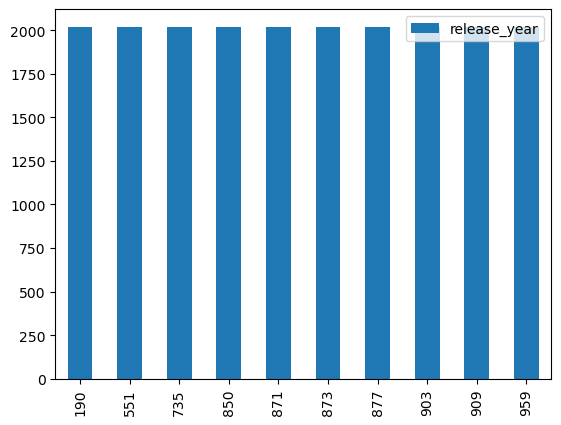

In [26]:
plt.figure(figsize=(10,4))
df1[(df1['type'] == "Movie") & (df1['country'] == "India") & (df1['release_year'] == 2021)].head(10).plot(kind='bar')
plt.show()

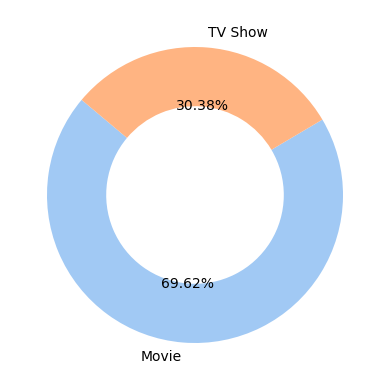

In [27]:
plt.figure(figsize=(20,4))
type_value_counts = df1['type'].value_counts().head()
colors = sns.color_palette('pastel',len(type_value_counts))
plt.pie(type_value_counts,labels=type_value_counts.index,
       autopct='%1.2f%%',startangle=140,colors=colors,wedgeprops=dict(width=0.4))
plt.tight_layout()
plt.show()

In [28]:
# df1['Month'] =  df1['date_added'].str.split(' ').str[0]
# df1['Day'] = df1['date_added'].str.split(' ').str[1]
# df1['Year'] = df1['date_added'].str.split(' ').str[2]

In [32]:
df1['date_added'] = pd.to_datetime(df1['date_added'])

In [40]:
df1['Month'] = df1['date_added'].dt.month
df1['Year'] = df1['date_added'].dt.year
df1['Day'] = df1['date_added'].dt.day
df1['weekday'] = df1['date_added'].dt.day_name()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Year,Day,weekday
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0,25.0,Saturday
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,2021.0,24.0,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,2021.0,24.0,Friday
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,2021.0,24.0,Friday
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,2021.0,24.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11.0,2019.0,20.0,Wednesday
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7.0,2019.0,1.0,Monday
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11.0,2019.0,1.0,Friday
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1.0,2020.0,11.0,Saturday
